# WeatherPy
----

### Analysis

1. The further you travel from the equator, the lower the maximum temperature is.  To the south of the equator, it lowers but not as much as it does to the north of the equator. 

2. The level of cloudiness looks to have consistent spreads regardless of the distance from the equator.  

3. The closer to the equator or poles, the less amount of range of the percentage of humidity. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs= []
cities = []

#cities_test = ['palabuhanratu', 'ilulissat', 'hobart', 'ushuaia', 'taolanaro', 'sangueya']

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities_test)



632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [15]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#url

#Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [4]:
# Print log of each processed city - including id and name
# Set lists to hold values from loop
id = []
name = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
cloudiness = []
wind = []


# File print
print("Beginning Data Retrieval")
print("----------------------------")

# record counter
record_count = 1

# Loop through list of cities and perform a request for data below on each city
for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        id.append(weather_response["id"])
        name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        cloudiness.append(weather_response["clouds"]["all"])
        date.append(weather_response["dt"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        long.append(weather_response["coord"]["lon"])
        wind.append(weather_response["wind"]["speed"])       
        
        print(f"Processing Record {record_count} of Set 1 | {city}")
    
        # Go to next record
        record_count = record_count + 1 
        
        # Set timer to not max API calls per minute
        time.sleep(1.5)
    
    except:
        print("City not found. Skipping...")
    continue

# End File print message
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | ambilobe
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | ray
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | grand-lahou
Processing Record 6 of Set 1 | plettenberg bay
Processing Record 7 of Set 1 | koyelga
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | pilar
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | garowe
Processing Record 15 of Set 1 | ahipara
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | chokurdakh
City not found. Skipping...
Processing Record 18 of Set 1 | lavrentiya
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | deputatskiy
Processing Record 21 of Set 1 | casa nova
Processing Record 22 of Set 1 | ushuaia
Processing Recor

Processing Record 188 of Set 1 | victoria
City not found. Skipping...
Processing Record 189 of Set 1 | salvador
Processing Record 190 of Set 1 | maryville
Processing Record 191 of Set 1 | toamasina
Processing Record 192 of Set 1 | brooks
Processing Record 193 of Set 1 | ojinaga
Processing Record 194 of Set 1 | avera
Processing Record 195 of Set 1 | airai
Processing Record 196 of Set 1 | nachingwea
Processing Record 197 of Set 1 | kapuskasing
Processing Record 198 of Set 1 | najran
Processing Record 199 of Set 1 | hambantota
Processing Record 200 of Set 1 | champerico
Processing Record 201 of Set 1 | mandurah
Processing Record 202 of Set 1 | beringovskiy
Processing Record 203 of Set 1 | wattegama
Processing Record 204 of Set 1 | arlit
City not found. Skipping...
Processing Record 205 of Set 1 | cabo san lucas
Processing Record 206 of Set 1 | fortuna
Processing Record 207 of Set 1 | kruisfontein
City not found. Skipping...
Processing Record 208 of Set 1 | esperance
City not found. Skippi

Processing Record 365 of Set 1 | tautira
Processing Record 366 of Set 1 | moussoro
City not found. Skipping...
Processing Record 367 of Set 1 | pak phanang
Processing Record 368 of Set 1 | urusha
Processing Record 369 of Set 1 | tateyama
City not found. Skipping...
Processing Record 370 of Set 1 | salekhard
Processing Record 371 of Set 1 | nelson bay
Processing Record 372 of Set 1 | trelew
Processing Record 373 of Set 1 | matinhos
City not found. Skipping...
Processing Record 374 of Set 1 | vrangel
Processing Record 375 of Set 1 | dharchula
Processing Record 376 of Set 1 | haverfordwest
City not found. Skipping...
Processing Record 377 of Set 1 | prince rupert
Processing Record 378 of Set 1 | vila franca do campo
Processing Record 379 of Set 1 | general pico
Processing Record 380 of Set 1 | awbari
Processing Record 381 of Set 1 | bolobo
City not found. Skipping...
Processing Record 382 of Set 1 | gizo
Processing Record 383 of Set 1 | butaritari
Processing Record 384 of Set 1 | te anau


Processing Record 541 of Set 1 | saint petersburg
Processing Record 542 of Set 1 | huicungo
Processing Record 543 of Set 1 | kasongo-lunda
Processing Record 544 of Set 1 | sitka
Processing Record 545 of Set 1 | hazorasp
Processing Record 546 of Set 1 | tevaitoa
City not found. Skipping...
City not found. Skipping...
Processing Record 547 of Set 1 | kutum
Processing Record 548 of Set 1 | kropotkin
Processing Record 549 of Set 1 | saquarema
Processing Record 550 of Set 1 | caxito
Processing Record 551 of Set 1 | berdigestyakh
Processing Record 552 of Set 1 | varhaug
Processing Record 553 of Set 1 | taylor
Processing Record 554 of Set 1 | santa isabel do rio negro
Processing Record 555 of Set 1 | west wendover
Processing Record 556 of Set 1 | pokrovskoye
Processing Record 557 of Set 1 | elat
Processing Record 558 of Set 1 | aksehir
Processing Record 559 of Set 1 | norman wells
Processing Record 560 of Set 1 | parrita
Processing Record 561 of Set 1 | paamiut
Processing Record 562 of Set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#output_data_file
weather_response.to_csv("weather_data.csv", index=False, header=True)

# Create dictionary for dataframe
weather_dict = {
    "City ID": id, 
    "City Name": name,
    "Country": country,
    "Date": date,
    "Humidity": humidity, 
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": max_temp,
    "Cloudiness": cloudiness,
    "Wind Speed": wind
}

# Create dataframe
weather_response = pd.DataFrame(weather_dict)
weather_response

,City ID,City Name,Country,Date,Humidity,Latitude,Longitude,Max Temp,Cloudiness,Wind Speed
0,1082243,Ambilobe,MG,1572044051,88,-13.19,49.05,70.93,0,6.51
1,2175403,Bluff,AU,1572044053,41,-23.58,149.07,77.02,0,5.10
2,5692590,Ray,US,1572044054,36,48.34,-103.17,64.99,1,18.34
3,5960603,Geraldton,CA,1572044056,65,49.72,-86.95,41.00,90,10.29
4,2288105,Grand-Lahou,CI,1572044058,86,5.24,-5.00,78.91,82,13.42
...,...,...,...,...,...,...,...,...,...,...
560,3421193,Paamiut,GL,1572044991,61,61.99,-49.67,34.59,50,15.59
561,1861280,Itoman,JP,1572044993,65,26.12,127.67,77.00,75,4.70
562,3625929,Tucupita,VE,1572044995,97,9.06,-62.05,75.67,90,3.58
563,2337542,Naze,NG,1572044996,94,5.43,7.07,77.00,40,4.61


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

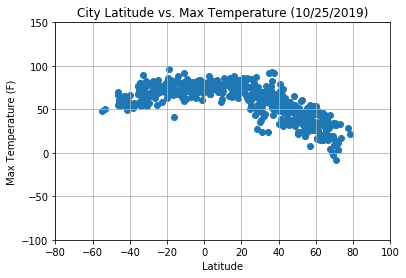

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_response["Latitude"], weather_response["Max Temp"], marker="o")

# Incorporate the other graph properties, including setting the x and y axis limits
plt.title("City Latitude vs. Max Temperature (10/25/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-80, 100)
plt.ylim(-100, 150)
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeMaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

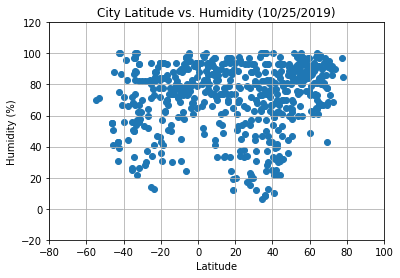

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_response["Latitude"], weather_response["Humidity"], marker="o")

# Incorporate the other graph properties, including setting the x and y axis limits
plt.title("City Latitude vs. Humidity (10/25/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

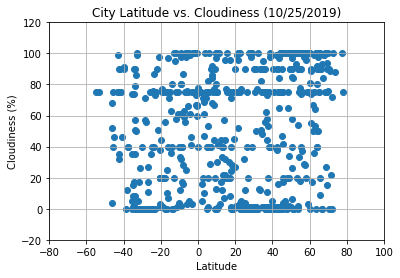

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_response["Latitude"], weather_response["Cloudiness"], marker="o")

# Incorporate the other graph properties, including setting the x and y axis limits
plt.title("City Latitude vs. Cloudiness (10/25/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

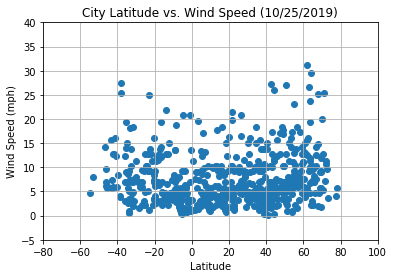

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_response["Latitude"], weather_response["Wind Speed"], marker="o")

# Incorporate the other graph properties, including setting the x and y axis limits
plt.title("City Latitude vs. Wind Speed (10/25/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeWindSpeed.png")

# Show plot
plt.show()